<a href="https://colab.research.google.com/github/mattbarreto/001/blob/master/Analisis_de_Texto_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMANDOS UTILES PARA TRABAJAR DESDE CONSOLA

Texto Plano

w3m -dump_source <url_del_sitio> > nombre_archivo.html
w3m -dump_source <url_del_sitio> > nombre_archivo.docx

Guarda con estilos y codigos de java script

wget --page-requisites <url_del_sitio>
wget --page-requisites <url_del_sitio> > sitio.html

In [ ]:
!pip install nltk
!pip install sklearn
!pip install matplotlib
!pip install --upgrade spacy
!pip install spacy-transformers
!python -m spacy download es_dep_news_trf
!pip install pyrae

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-25 21:27:42.930664: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410.2 MB 32 kB/s 
✔ Download and installation successful
You 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import spacy
import spacy_transformers

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import re

In [ ]:
# Abrimos el archivo de texto y lo leemos
with open('/content/drive/MyDrive/Analisis de Textos/Un_Potrero_Tomado_por_las_masas.docx', 'r', encoding='utf-8') as f:
    texto = f.read()

In [ ]:
def limpiar(texto):
    puntuación = r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'
    
    # signos de puntuación
    texto = re.sub(puntuación, ' ', texto)
    
    # dígitos [0-9]
    texto = re.sub('\d', ' ', texto)

    return texto

In [ ]:
# Tokenizamos el texto y filtramos las palabras
tokens = nltk.word_tokenize(texto)
exclusiones = ['A', 'ver','parte','ella', 'ahora', 'hay', 'así', 'No', 'aquel', 'hace','todos','siempre','me','estar','Lo','eso','acá','sí','desde', 'hacia', 'somos', 'mismo','era','cuando','cada','también','tanto','bajo','sino','qué','dice','luego','si','donde','ya','Otro','otro','uno','Los','te','sin','los','son','ante', 'tan', 'solo', '.',',','de', 'el','la', 'porque', 'En','en', 'hasta','La', 'Sus', 'sus','nos', 'y', 'las', ':', 'como', 'con', ';', 'se','”','“','no', 'un', 'los','del', 'a','que','en', 'El', 'le', '(', ')', 'Y', 'para', 'al', 'su', 'más', '?', 'lo', 'una', 'es', 'por', 'fue', 'sobre', 'todo','pero','o', 'tambien',]
palabras_filtradas = [palabra for palabra in tokens if palabra not in exclusiones]

# Calculamos la frecuencia de las palabras y obtenemos la palabra más frecuente
frecuencia = nltk.FreqDist(palabras_filtradas)
palabra_mas_frecuente = frecuencia.max()
print(f'La palabra más frecuente es "{palabra_mas_frecuente}"')

# Obtenemos los bigramas y los filtramos
bigramas = nltk.bigrams(tokens)
exclusiones = ['de', 'en', 'el', ',', 'y', '.', 'que', 'no', 'a', 'la', 'las', 'con', 'su','?', ')',':', '“']
bigramas_filtrados = [bigrama for bigrama in bigramas if bigrama[0] not in exclusiones and bigrama[1] not in exclusiones]

# Calculamos la frecuencia de los bigramas y obtenemos la expresión más frecuente
frecuencia_bigramas = nltk.FreqDist(bigramas_filtrados)
expresion_mas_frecuente = frecuencia_bigramas.max()
print(f'La expresión más frecuente es "{expresion_mas_frecuente}"')

stop_words = nltk.corpus.stopwords.words('spanish') + ['tiempo','siempre','estar','Lo','eso','acá','sí','desde', 'hacia', 'somos', 'mismo','era','cuando','cada','también','tanto','bajo','sino','qué','dice','luego','si','donde','ya','Otro','otro','uno','Los','te','sin','los','son','ante', 'tan', 'solo', '.',',','de', 'el','la', 'porque', 'En','en', 'hasta','La', 'Sus', 'sus','nos', 'y', 'las', ':', 'como', 'con', ';', 'se','”','“','no', 'un', 'los','del', 'a','que','en', 'El', 'le', '(', ')', 'Y', 'para', 'al', 'su', 'más', '?', 'lo', 'una', 'es', 'por', 'fue', 'sobre', 'todo','pero','o', 'tambien',]
vectorizador = TfidfVectorizer(stop_words=stop_words)
matriz_tfidf = vectorizador.fit_transform([texto])
#palabras = vectorizador.get_feature_names()
palabras = vectorizador.get_feature_names_out()

indices_mas_importantes = matriz_tfidf.toarray()[0].argsort()[::-1]
palabra_mas_importante = palabras[indices_mas_importantes[0]]
print(f'La palabra más importante es "{palabra_mas_importante}"')

n = 10
palabras_mas_importantes = [palabras[indice] for indice in indices_mas_importantes[:n]]
print(f'Las {n} palabras más importantes son: {palabras_mas_importantes}')

idea_central = ' '.join(palabras_mas_importantes)
print(f'La idea central del texto puede tratar de componerse a partir de las siguientes palabras: {idea_central}')

palabras_mas_frecuentes = frecuencia.most_common(25)
palabras_mas_frecuentes = sorted(palabras_mas_frecuentes, key=lambda x: x[1], reverse=True)

print('Las 25 palabras más frecuentes son:')
for palabra, cantidad in palabras_mas_frecuentes:
    print(f'{palabra}: {cantidad}')



La palabra más frecuente es "Messi"
La expresión más frecuente es "('del', 'mundo')"
La palabra más importante es "messi"
Las 10 palabras más importantes son: ['messi', 'fútbol', 'copa', 'jugadores', 'argentina', 'juego', 'masa', 'jugador', 'campeón', 'hinchas']
La idea central del texto puede tratar de componerse a partir de las siguientes palabras: messi fútbol copa jugadores argentina juego masa jugador campeón hinchas
Las 25 palabras más frecuentes son:
Messi: 13
fútbol: 10
nosotros: 8
jugadores: 8
tiempo: 7
juego: 7
Argentina: 6
campeón: 6
masa: 6
Dibu: 6
hinchas: 6
jugador: 6
masas: 5
copa: 5
mundial: 5
mientras: 5
equipo: 5
jugar: 5
festejos: 5
nuestro: 5
fiesta: 4
Julio: 4
calles: 4
alegría: 4
regaló: 4


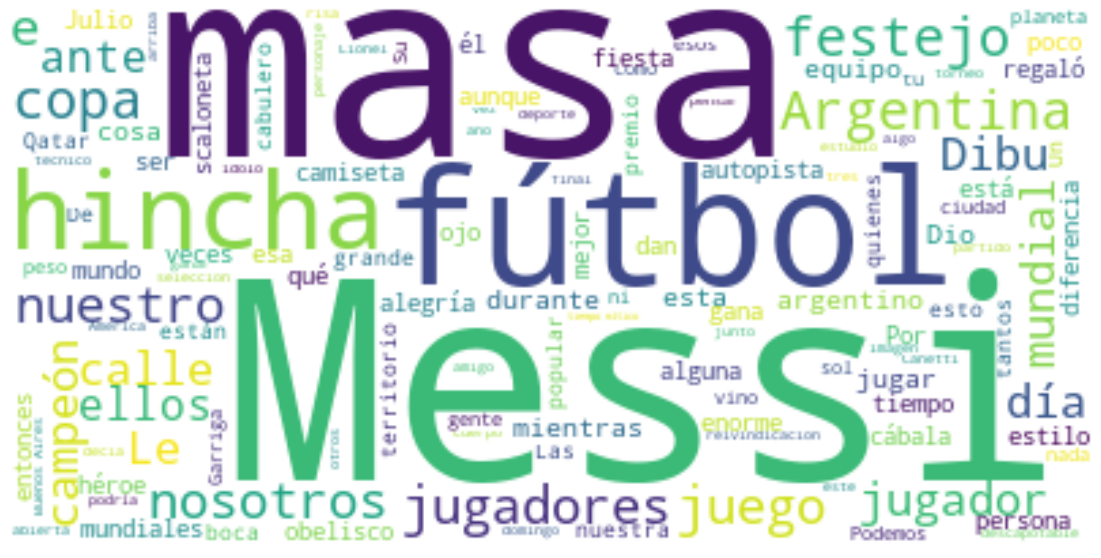

In [ ]:
# Importamos la librería WordCloud
from wordcloud import WordCloud
from random import randint

# Unimos las palabras de la lista en una cadena de caracteres
texto = ' '.join(palabras_filtradas)

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(texto)

# Establecemos el color de fondo en blanco
wordcloud.background_color = "white"

# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % randint(100, 200)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

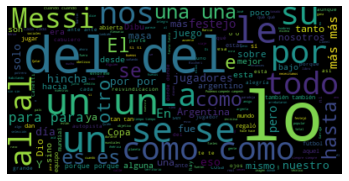

In [ ]:
# Convertimos cada tupla en una cadena de caracteres
bigramas_filtrados = [' '.join(bigrama) for bigrama in bigramas_filtrados]

# Unimos los bigramas de la lista en una cadena de caracteres
texto = ' '.join(bigramas_filtrados)

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(texto)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

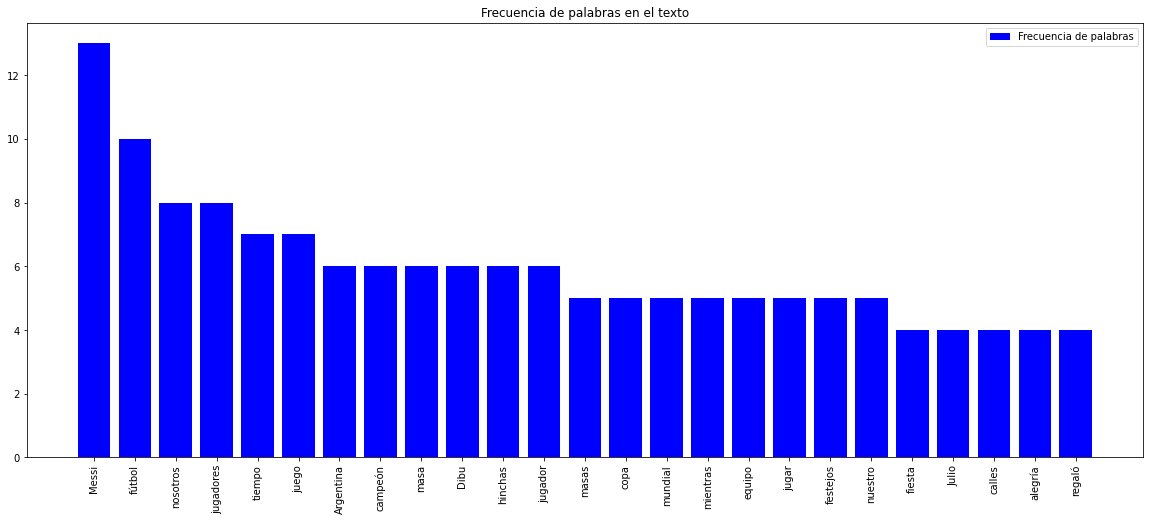

In [ ]:
# Obtenemos las palabras y las frecuencias de la lista de palabras más frecuentes
palabras, frecuencias = zip(*palabras_mas_frecuentes)

# Cambiar el tamaño del gráfico: Puedes utilizar la función figure() para cambiar el tamaño del gráfico. Por ejemplo:
plt.figure(figsize=(20,8))

# Añadir un título al gráfico: Puedes utilizar la función title() para añadir un título al gráfico. Por ejemplo:
plt.title('Frecuencia de palabras en el texto')

# Creamos el gráfico de barras
plt.bar(palabras, frecuencias, color=["b"])

# Añadir etiquetas al eje X: Puedes utilizar la función xticks() para añadir etiquetas al eje X. Esto es útil si las palabras son demasiado largas y no caben en el gráfico. Por ejemplo:
plt.xticks(rotation=90)

#Añadir una leyenda: Puedes utilizar la función legend() para añadir una leyenda al gráfico. Por ejemplo:
plt.legend(['Frecuencia de palabras'])

# Mostramos el gráfico
plt.show()


# Redes de palabras

Un ejemplo de cómo realizar un análisis de redes de palabras en el archivo .docx utilizando la librería NetworkX

El código primero abre el archivo .docx y lee su contenido. Luego, crea una lista de tokens eliminando las palabras de parada (utilizando la función word_tokenize de la librería nltk).

A continuación, se crea una lista de bigramas utilizando la frecuencia más alta (utilizando la clase BigramCollocationFinder de la librería nltk).

Luego, se crea una red de palabras utilizando los bigramas y se añaden los nodos y aristas a la red utilizando la librería NetworkX. Por último, se dibuja la red de palabras utilizando la librería Matplotlib.

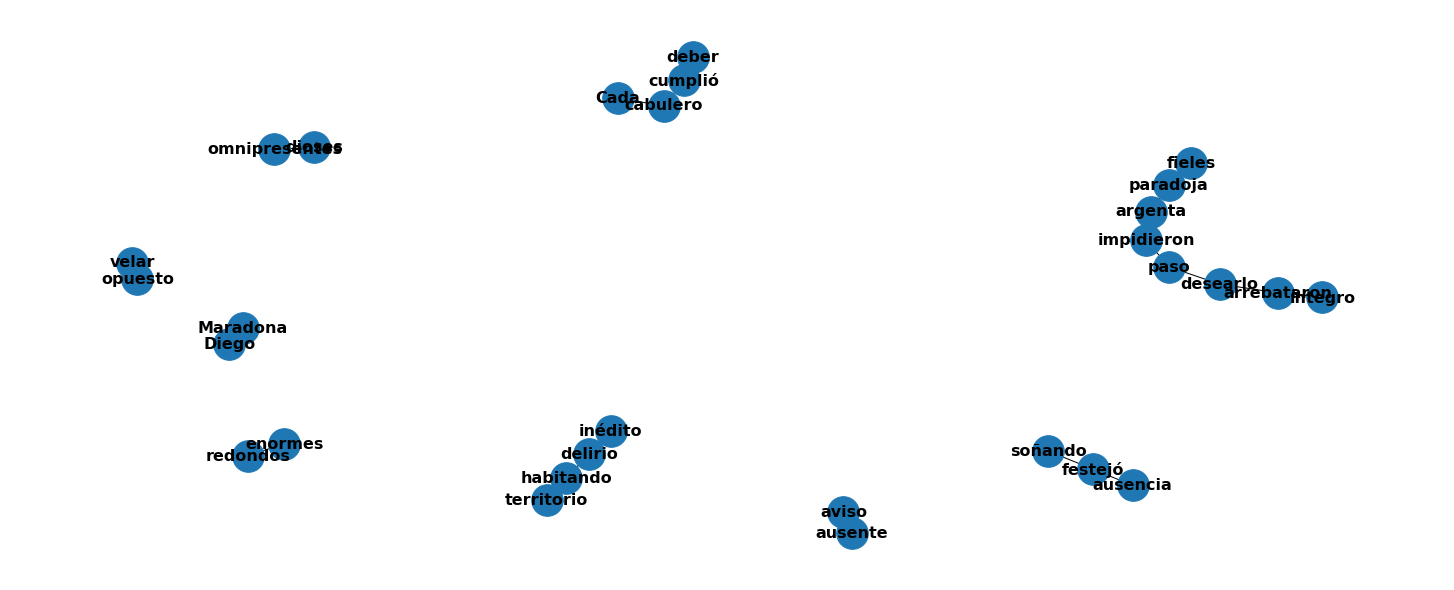

In [ ]:
# Importa las librerías necesarias
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Abre el archivo y lee el contenido
with open('/content/drive/MyDrive/Analisis de Textos/Un_Potrero_Tomado_por_las_masas.docx', 'r', encoding='utf-8') as f:
    texto = f.read()

# Crea una lista de tokens eliminando las palabras de parada
stopwords_es = stopwords.words('spanish') + ['A', 'ver','parte','ella', 'ahora', 'hay', 'así', 'No', 'aquel', 'hace','todos','siempre','me','estar','Lo','eso','acá','sí','desde', 'hacia', 'somos', 'mismo','era','cuando','cada','también','tanto','bajo','sino','qué','dice','luego','si','donde','ya','Otro','otro','uno','Los','te','sin','los','son','ante', 'tan', 'solo', '.',',','de', 'el','la', 'porque', 'En','en', 'hasta','La', 'Sus', 'sus','nos', 'y', 'las', ':', 'como', 'con', ';', 'se','”','“','no', 'un', 'los','del', 'a','que','en', 'El', 'le', '(', ')', 'Y', 'para', 'al', 'su', 'más', '?', 'lo', 'una', 'es', 'por', 'fue', 'sobre', 'todo','pero','o', 'tambien',]
tokens = [token for token in word_tokenize(texto) if token not in stopwords_es]

# Crea una lista de bigramas utilizando la frecuencia más alta
finder = BigramCollocationFinder.from_words(tokens)
finder.apply_word_filter(lambda w: w in stopwords_es)
finder.apply_freq_filter(2)
bigramas = finder.nbest(BigramAssocMeasures.pmi, 20)

# Crea una red de palabras utilizando los bigramas
red = nx.Graph()

# Añade los nodos a la red
for bigrama in bigramas:
    red.add_node(bigrama[0])
    red.add_node(bigrama[1])

# Añade las aristas a la red
for bigrama in bigramas:
    red.add_edge(bigrama[0], bigrama[1])

plt.figure(figsize=(20,8))

# Dibuja la red de palabras
posiciones = nx.spring_layout(red)
nx.draw(red, posiciones, with_labels=True, node_size=1000, font_size=16, font_weight='bold')

# Muestra el gráfico
plt.show()

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%bash
python -m spacy download es_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


2022-12-24 14:45:12.405397: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import spacy
nlp = spacy.load('es_core_news_lg')

In [ ]:
# Leemos el texto a analizar
texto = open("/content/drive/MyDrive/Analisis de Textos/Un_Potrero_Tomado_por_las_masas.docx", "r", encoding="utf-8").read()

In [ ]:
# Procesamos el texto con spacy
doc = nlp(texto)

In [ ]:
# Visualizamos el análisis de discurso del texto
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

# Generacion de Resumenes

Gnerar resúmenes automáticos de documentos en español, puedes utilizar la librería gensim o sumy. A continuación, un ejemplo de cómo hacerlo con la librería gensim:

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Importar la librería y cargar el texto del documento que quieres resumir:

In [ ]:
from gensim.summarization import summarize

# Abre el archivo del documento que quieres resumir
with open('/content/drive/MyDrive/Analisis de Textos/Un_Potrero_Tomado_por_las_masas.docx', 'r', encoding='utf-8') as f:
    texto = f.read()

Para generar el resumen, utilizar la función summarize de gensim y especificar la cantidad de palabras que quieres que tenga el resumen:


In [ ]:
resumen = summarize(texto, word_count=100)
print(resumen)

La fiesta más grande del mundo fue una masa sacrificada y expansiva sobre la 9
Messi, los voladores Dibu que es tan real como caricatura, en paracaídas, uno a
Messi al contestarle al jugador de Países Bajos que nos regaló una nueva joya
de Messi, por lo bajo, como lo hacía aquel esclavo que caminaba junto al
plebes, los disconformes, se apropian del juego, y se mostraron más que en
televisivas- la hacen los mismos jugadores (Messi abrazado a la copa como
San Martín arriba del caballo que cruza los Andes y nos libera; Messi y el Kun,
